In [3]:
import pandas as pd  
import numpy as np  

#visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sb

#scikit learn
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 

In [4]:
weather_data = pd.read_csv('weatherHistory.csv')

In [5]:
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
weather_data.shape

(96453, 12)

In [7]:
weather_data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [8]:
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

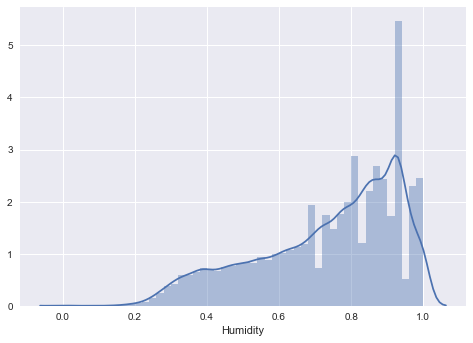

In [9]:
sb.distplot(weather_data.Humidity)

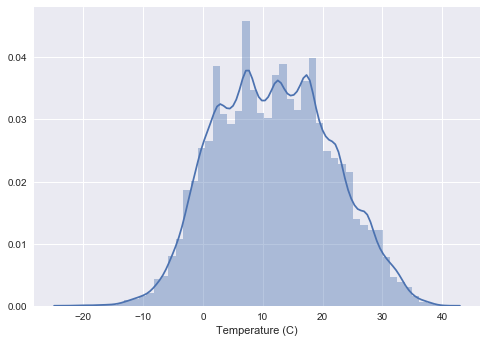

In [10]:
sb.distplot(weather_data['Temperature (C)'])

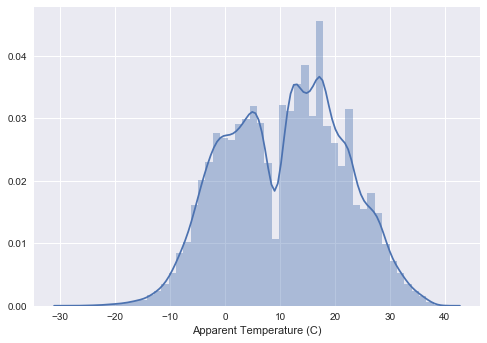

In [11]:
sb.distplot(weather_data['Apparent Temperature (C)'])

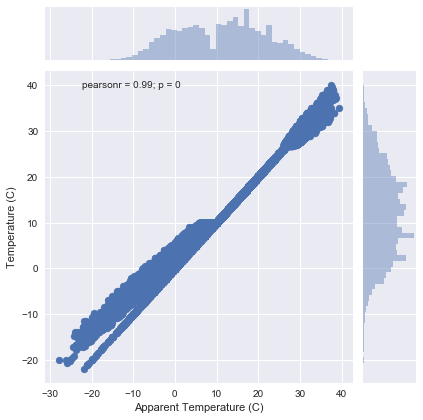

In [12]:
sb.jointplot(x='Apparent Temperature (C)', y='Temperature (C)', data=weather_data);

In [59]:
# creating train test

X = weather_data[['Summary','Precip Type','Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']] 

y = weather_data.iloc[:, 3].values  

In [65]:
X['Summary'] = X['Summary'].astype("category")
X['Precip Type'] = X['Precip Type'].astype("category")

X[['Summary','Precip Type']] = X[['Summary','Precip Type']].apply(lambda x: x.cat.codes)

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bhanu\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [67]:
X = X.values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [69]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
print(regressor.intercept_)

44.5680994172


In [77]:
print(regressor.coef_) 

[  6.96572969e-02  -1.18262807e+01  -2.65000171e+01  -2.09305749e-01
   2.18542466e-03   1.93123774e-01   0.00000000e+00  -1.33195709e-03]


In [72]:
y_pred = regressor.predict(X_test)  

In [74]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)  

,Actual,Predicted
0,14.422222,10.839869
1,12.155556,13.018346
2,23.961111,16.764801
3,15.000000,8.665827
4,12.800000,13.077589


In [75]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.94568844689
Mean Squared Error: 36.7944305029
Root Mean Squared Error: 6.06584128566


In [80]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\bhanu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\bhanu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\bhanu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bhanu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bhanu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 3.910e+04
Date:                Wed, 04 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:23:07   Log-Likelihood:            -2.6154e+05
No. Observations:               77162   AIC:                         5.231e+05
Df Residuals:                   77155   BIC:                         5.232e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2938      0.006     49.990      0.000       0.282       0.305
x2            -7.7639      0.080    -97.604      0.000      -7.920      -7.608
x3           -17.2572      0.133   -129.628      0.000     -17.518     -16.996
x4            -0.0717      0.004    -19.125      0.000      -0.079      -0.064
x5             0.0067      0.000     27.830      0.000       0.006       0.007
x6             0.5422      0.006     84.043      0.000       0.530       0.555
const               0          0        nan        nan           0           0
x7             0.0220      0.000    134.566      0.000       0.022       0.022
==============================================================================
Omnibus:                     4821.978   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8731.939
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                       4.351   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""